# Plotting Sigmoid function

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

$S_{w,b} = \frac{1}{1+e^{-(wx+b)}}$

In [2]:
def sigmoid(x,w,b):
    return 1/(1+np.exp(-(w*x+b)))

In [3]:
X = np.linspace(-10,10,100)
w = 1
b = 0
Y = sigmoid(X,w,b) # Note python broadcasting 

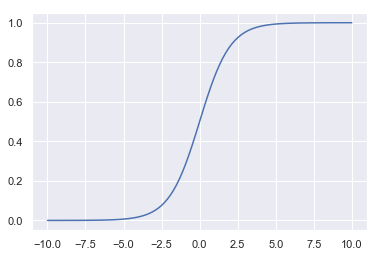

In [4]:
sns.set()
plt.plot(X,Y)

$S(x_1,x_2) = \frac{1}{1+e^{-(w_1x_1+w_2x_2+b)}}$

In [5]:
def sigmoid_2d(x_1, x_2, w_1, w_2, b):
    return 1/(1+np.exp(-(w_1*x_1+w_2*x_2+b)))
    

In [6]:
from mpl_toolkits import mplot3d

X1 = np.linspace(-10,10,100)
X2 = np.linspace(-10,10,100)

XX1, XX2 = np.meshgrid(X1, X2)

In [7]:
w_1 = 0.5
w_2 = 0.5
b = 0
YY = sigmoid_2d(XX1,XX2,w_1,w_2,b)

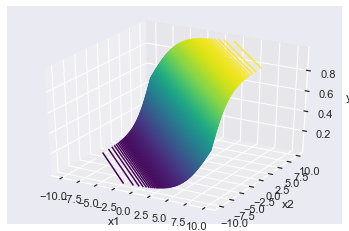

In [8]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(XX1, XX2, YY, 400, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y');
#ax.view_init(30,180)

In [9]:
# Computing the model parameters using grid search

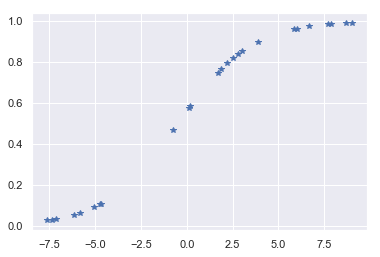

In [10]:
w_unknown = 0.5
b_unknown = 0.25

X = np.random.random(25) * 20 - 10
Y = sigmoid(X, w_unknown, b_unknown)

plt.plot(X,Y,'*')

In [11]:
def compute_loss(X, Y, w_est, b_est):
    loss = 0
    for x,y in zip(X,Y):
        loss = loss + (y - sigmoid(x, w_est, b_est))**2
    return loss

In [12]:
W = np.linspace(0,2,100)
B = np.linspace(-1,1,100)

WW, BB = np.meshgrid(W, B)

In [13]:
Loss = np.zeros(WW.shape)
for i in range(WW.shape[0]):
    for j in range(WW.shape[1]):
        Loss[i,j] = compute_loss(X, Y, WW[i,j], BB[i,j])
        

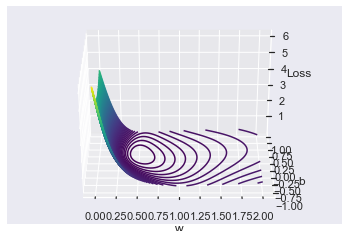

In [14]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(WW, BB, Loss, 200, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss');
ax.view_init(30,270)

In [15]:
ij = np.argmin(Loss)
i = int(np.floor(ij/Loss.shape[1]))
j = int(ij - Loss.shape[1]*i)
print(Loss[i,j], WW[i,j], BB[i,j])

5.916595211379404e-05 0.5050505050505051 0.2525252525252526


In [16]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",['red','yellow','green'])

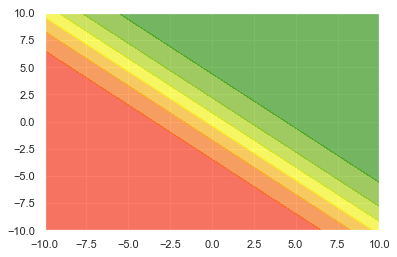

In [17]:
# Plotting contour maps
plt.contourf(XX1, XX2, YY, cmap=my_cmap, alpha=0.6)
plt.show()

In [48]:
class SigmoidNeuron():
    
    def __init__(self):
        self.w = None
        self.b = None
    
    def perceptron(self, x):
        return np.dot(x, self.w.T) + self.b
        
    def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))
    
    def grad_w(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1-y_pred) * x
    
    def grad_b(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1-y_pred)
    
    def fit(self, X, Y, epochs=1, learning_rate=1, initialize=True):
        if initialize:
            self.w = np.random.randn(1, X.shape[1])
            self.b = 0
        
        for i in range(epochs):
            dw = 0
            db = 0
            for x,y in zip(X,Y):
                dw = dw + self.grad_w(x, y)
                db = db + self.grad_b(x, y)
            self.w = self.w - learning_rate*dw
            self.b = self.b - learning_rate*db

In [90]:
X = np.asarray([[2.5, 2.5], [1,-4], [4,-1], [-3,1.25], [-2,-4], [1,5]])
Y = [1, 1, 1, 0 , 0, 0]

In [91]:
sn = SigmoidNeuron()
sn.fit(X, Y, 1, 0.5, True)

In [92]:
def plot_sn(X, Y, sn, ax):
    X1 = np.linspace(-10, 10, 100)
    X2 = np.linspace(-10, 10, 100)
    XX1, XX2 = np.meshgrid(X1, X2)
    YY = np.zeros(XX1.shape)
    for i in range(X2.size):
        for j in range(X1.size):
            val = np.asarray([X1[j],X2[i]])
            YY[i,j] = sn.sigmoid(sn.perceptron(val))
    ax.contourf(XX1, XX2, YY, cmap=my_cmap, alpha=0.6)
    ax.scatter(X[:,0],X[:,1],c=Y, cmap=my_cmap)
    ax.plot()

[[ 1.01498437 -0.52302715]] [-0.11479726]
[[ 1.27176558 -0.15303426]] [-0.18498267]
[[ 1.20524159 -0.70444376]] [-0.28036546]
[[ 1.50363493 -0.22316577]] [-0.34163535]
[[ 1.43027469 -0.7143795 ]] [-0.43116765]
[[ 1.63018225 -0.38943953]] [-0.4797597]
[[ 1.60490793 -0.6142735 ]] [-0.53064275]
[[ 1.67701302 -0.52756705]] [-0.5568819]
[[ 1.69780525 -0.56568313]] [-0.58316505]
[[ 1.72881243 -0.56837085]] [-0.60575158]
[[ 1.75546406 -0.57801944]] [-0.62714172]
[[ 1.78103394 -0.58610441]] [-0.64712028]
[[ 1.80524247 -0.59387021]] [-0.66589549]
[[ 1.82825643 -0.60124985]] [-0.68358885]
[[ 1.85018472 -0.60828325]] [-0.70030931]
[[ 1.87112339 -0.61500106]] [-0.71615062]
[[ 1.89115646 -0.62143009]] [-0.7311941]
[[ 1.91035777 -0.6275939 ]] [-0.74551073]
[[ 1.92879258 -0.63351328]] [-0.75916275]
[[ 1.94651882 -0.63920672]] [-0.77220504]


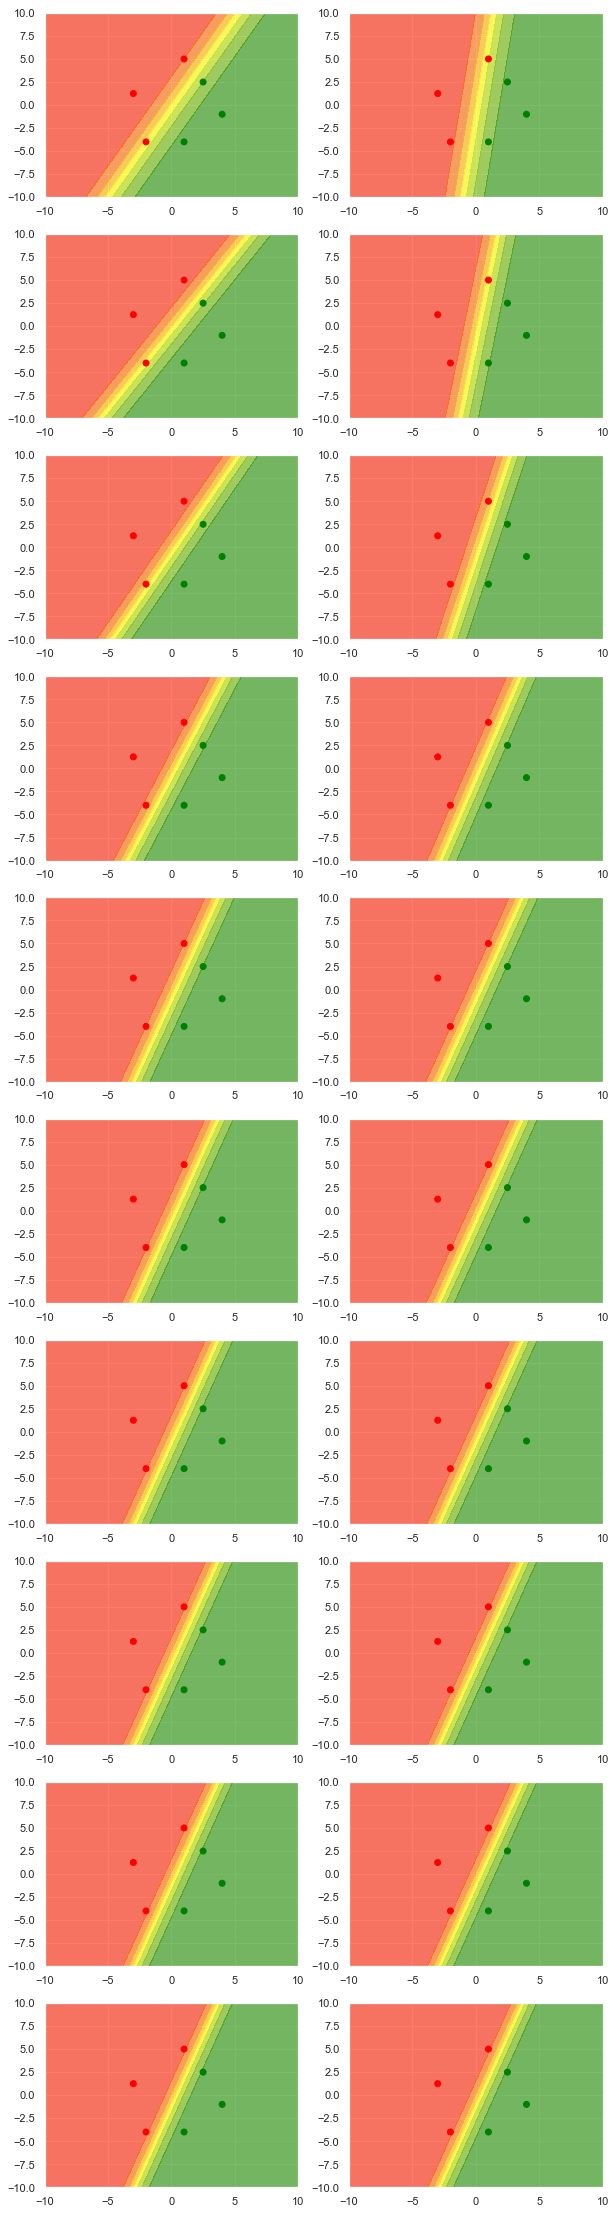

In [93]:
N = 20
plt.figure(figsize=(10,2*N))
for i in range(N):
    sn.fit(X, Y, 1, 0.75, False)
    ax = plt.subplot(N//2, 2, i+1)
    plot_sn(X, Y, sn, ax)
    print(sn.w, sn.b)

# Load Data

In [94]:
!wget = https://www.dropbox.com/s/739uo8ebwbic9kb/mobile_cleaned.csv

/bin/sh: wget: command not found
